##### Introduction to Information Theory (Fall 2025/6)

# Home Assignment 5

#### Topics:
- Markov Chains
- Channel Capacity

#### Due: 19/1/2025 before the class

#### Instructions:
- Write your names and date in the cell below.
- Submit a copy of this notebook with code filled in the relevant places as the solution to coding exercises.
- You are welcomed to ask for hints, clarifications, or report issues on **Piazza**.
- For theoretic exercises, you can either write your solution in the notebook using $\LaTeX$ (recommended) or submit additional notes.
- Logarithm is in base $2$ unless stated otherwise.
- For chain of equalities or inequalities, make sure to explain every non-trivial transition.

**Date**: 15/12/2025

**Name 1**: Guy Ben Ari

**ID 1**: 203020623

**Name 2**: Niv Ben Salmon

**ID 2**: 315073346

### 1. Capacity of non-DMCs 
In class we proved that the capacity of a DMC is given by
$$
C = \sup_{p(x)} I(X;Y).
$$
We now consider channels that are not necessarily DMSc. For such channels, we define the operational capacity in the same way as the supremum of achievable rates. We define the information capacity as 
$$
C := \limsup_{n \to \infty} \sup_{p(x^n)} \frac{1}{n}I(X^n;Y^n). 
$$

Prove a converse channel coding for this channel. Namely, that the operational capacity does not exceed the information capacity. Hint: follow similar steps as in the DMC converse. 


Remark: Unlike DMC, it is typically challenging to evaluate $C$ since it involves solving a sequence of $n$-dimensional optimization problems. 



**Converse (channel coding theorem for general channels):**

Let a rate $R$ be achievable. Then there exists a sequence of $(n, M_n)$ codes with
$M_n = 2^{nR}$ and error probability $P_e^{(n)} \to 0$.

Let $W$ be the message, uniformly distributed on $\{1,\dots,M_n\}$, and let
$X^n, Y^n$ denote the channel input and output.

By Fano’s inequality,
$$
H(W \mid Y^n) \le n \varepsilon_n,
$$
where $\varepsilon_n \to 0$ as $n \to \infty$.


Thus,
$$
nR = H(W) = I(W; Y^n) + H(W \mid Y^n)
\le I(W; Y^n) + n \varepsilon_n.
$$

Since $W \to X^n \to Y^n$ is a Markov chain,
$$
I(W; Y^n) \le I(X^n; Y^n).
$$

Therefore,
$$
R \le \frac{1}{n} I(X^n; Y^n) + \varepsilon_n
\le \sup_{p(x^n)} \frac{1}{n} I(X^n; Y^n) + \varepsilon_n.
$$

Taking $n \to \infty$,
$$
R \le \limsup_{n \to \infty} \sup_{p(x^n)} \frac{1}{n} I(X^n; Y^n) = C.
$$

Hence, the operational capacity does not exceed the information capacity.


## Problem 1: Markov Chain and Data Compression

Consider a Markov Chain with transition probability matrix $Q$ whose rows are proportional to
$$
Q' = \begin{bmatrix}
9 & 1 & 2  & & & & & & & & & & &\\
1 & 3 & 1 & & & & & & & & & & &\\  
1 & 1 & 9 & 1 & 2 & & & & & & &\\ 
  &   & 1 & 3 & 1 & & & & & & &\\
  &   & 1 & 1 & 9 & 1 & 2 & & &\\
  &   &   &   & 1 & 3 & 1 & & & & &\\
  &   &   &   & 1 & 1 & 9 & 1 & 2 &\\
  &   &   &   &   &   & 1 & 3 & 1 &  & &\\
  &   &   &   &   &   & 1 & 1 & 9 & 1 & 2 &\\
  &   &   &   &   &   &   &   & 1 & 3 & 1 &\\
  &   &   &   &   &   &   &   & 1 & 1 & 9 & 1 & 2 \\
  &   &   &   &   &   &   &   &   &   & 1 & 3 & 1\\
  &   &   &   &   &   &   &   &   &   & 1 & 1 & 9 \\
\end{bmatrix}
$$
For simplicity, we will denote the states by the first 13 English letters, i.e. $\mathcal X = \{a,b,...,m\}$. For example, the probability of transitioning from 'a' to 'a' is $9/12$ and the probability of transitioning from 'c' to 'b' is $1/14$. The function `build_Q` below returns such $Q$. 

1. Is the Markov chain ergodic? Explain. 
2. Find the stationary distribution (write a code to evaluate this distribution and plot it; make sure to label the states correctly with letters.)
3. What is the entropy rate of this chain? (write a code to evaluate and print it)
4. Write a program that samples from the chain a sequence of length $n$ given the initial state $x="a"$. Print the result for $n=500$. Use the ``numpy.random`` as your random number generation interface and set your seed as you ID number.
5. Use a Huffman code to encode a sample from the chain:
  - (1) Sample a sequence of length $n=10,000$. Find the empirical distribution of times spent at each state and plot this distribution.
  - (2) Use the **stationary distribution** to generate the Huffman code. Recall that you may reuse code from a previous assignment to implement Huffman coding. 
  - (3) Compress the sequence using the Huffman code and decompress it back to verify correctness. Use the function prototype below for the compression and decompression operation. 
  - (4) Report the resulting average number of bits per symbol. Do not include the length of the code in this evaluation. Use the function `check_compression` for this step. This function is provided below along with an example use case using a dummy compressor and decompressor. 
  - (5) If you repeat 5.1 - 5.4 while gradually increasing $n$, what is the limiting number of average bits per symbol?
6. We will now study a different compression procedure for the Markov chain. The move-to-front (M2F) transform of a sequence replaces every symbol with its index in the stack of recently used (RL) symbols. For example, with an initial list of 'abcdefg', the sequence 'abaafcaga' is transformed to '011053261'. Explanation:

| i | RL list | i-th letter | output
| :- | -: | -: | -: |
| 1 | abcdefg | a | 0 |
| 2 | abcdefg | b | 1 |
| 3 | bacdefg | a | 1 |
| 4 | abcdefg | a | 0 |
| 5 | abcdefg | f | 5 | 
| 6 | fabcdeg | c | 3 |
| 7 | cfabdeg | a | 2 |
| 8 | acfbdeg | g | 6 | 
| 9 | gacfbde | a | 1 |

- (1) Implement this transformation by completing the provided prototype `move_to_front_transform`. Make sure that the complexity is linear in the sequence length. 
- (2) Argue that this transformation is invertible. Write a function to invert it by completing the provided prototype `inverse_move_to_front_transform`. 
- (3) Apply this transformation to the sample from the Markov chain you obtained in 5.1. Plot the histogram of the sequence of *integers* obtained after the transformation.
- (4) Outline a procedure for compressing the Markov chain using the M2F transform and Huffman coding.
- (5) Intuitively explain why your compression procedure is better than Huffman coding.
- (6) Implement the compressor and decompressor by completing the provided prototypes. 
- (7) Compress the sample you obtained in 5.1 using this procedure and report the average number of bits per symbol using the function `check_compression`.
- (8) Has the compression ratio improved compared to vanilla Huffman coding?
- (9) What is the gap of the compression ratio in (8) from the optimal asymptotic compression ratio?

## Answer - Problem 1

**1. Is the Markov chain ergodic?**

A Markov chain is **ergodic** if it is **irreducible** (all states communicate) and **aperiodic** (gcd of all cycle lengths is 1).

- **Irreducibility:**
  Every state can reach every other state via a series of transitions because the matrix $Q$ has positive entries connecting neighboring states and longer jumps (e.g., $a \to c$). Hence, the chain is **irreducible**.

- **Aperiodicity:**
  Each state has a self-loop with positive probability ($Q_{ii} > 0$). Therefore, the period of every state is 1, making the chain **aperiodic**.

**Conclusion:**
Since the chain is both irreducible and aperiodic, it is **ergodic**.

**2. Find the stationary distribution**

Added function "compute_stationary" in cell at the end

**3. Find the entropy rate**

Added function "entropy_rate" in cell at the end

**4. Sample from chain**

Added function "sample_markov" in cell at the end






In [122]:
"""
This cell contains a functions the function `build_Q` that returns the stochstic matrix coresponding to Q in the description above. 

Additonal functions that may be useful are also included.
The function `letters_to_integers` converts a string to a list of integers based on a dictionary.
The function `integers_to_letters` converts a list of integers to a string based on a dictionary.
The function `integers_to_binary` converts a list of integers (0:(2^k-1)) to a binary string of length k * len(lo_integers).
The function `binary_to_integers` converts a binary string of length k * len(s) to a list of integers.
The function `entropy` calculates the entropy of a discrete distribution.

"""
import numpy as np
from matplotlib import pyplot as plt


YOUR_ID_NUMBER = 203020623 # modify this to your ID number
np.random.seed(YOUR_ID_NUMBER)

import numpy as np
def build_Q():
    """
    Returns:
    Q: a 13x13 numpy array representing the transition matrix for the Markov chain.
    """
    n = 13
    Q = np.zeros((n, n))
    for i in range(n):
        Q[i, i] = 9 if i % 2 == 0 else 3
        if i+1 < n:
            Q[i, i+1] = 1
            Q[i+1, i] = 1
    Q[0, 2] = 2; Q[2, 0] = 1
    Q[2, 4] = 2; Q[4, 2] = 1
    Q[4, 6] = 2; Q[6, 4] = 1
    Q[6, 8] = 2; Q[8, 6] = 1
    Q[8, 10] = 2; Q[10, 8] = 1
    Q[10, 12] = 2; Q[12, 10] = 1
    return Q / Q.sum(axis=1, keepdims=True)

Xcal = list('abcdefghijklm')


def letters_to_integers(s, dictionary):
    """
    Convert a string to a list of integers based on a dictionary.
    """
    return [dictionary.index(c) for c in s]

def integers_to_letters(lo_integers, dictionary):
    """
    Convert a list of integers to a string based on a dictionary.
    """
    return [dictionary[i] for i in lo_integers]

def integers_to_binary(lo_integers, k=4):
    """
    Convert a list of integers (0:(2^k-1)) to a binary string of length k * len(lo_integers).
    """
    return "".join([np.binary_repr(i, width=k) for i in lo_integers])

def binary_to_integers(s, k=4):
    """
    Convert a binary string of length k * len(s) to a list of integers.
    """
    return [int(s[i:i+k], 2) for i in range(0, len(s), k)]


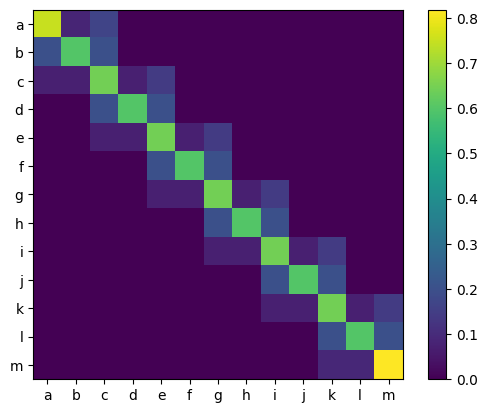

In [123]:
# get and plot the transition matrix:
Q = build_Q()
plt.imshow(Q)

# set the xticks and yticks to be the letters
plt.xticks(range(13), integers_to_letters(range(13), Xcal))
plt.yticks(range(13), integers_to_letters(range(13), Xcal))
plt.colorbar()
plt.show()

In [124]:
def check_compression(data, compressor, decompressor):
    """
    Check that the compressor and decompressor work correctly and report the size of the compression and the 
    compression ratio. 

    Args:
    data: a 1D numpy array of letters from the alphabet 'abcdefghijklm'.
    compressor: a function that takes in data and returns a tuple of compressed data and a code. 
                The compressed data must be a 1D numpy array of bits (0s and 1s). 
    decompressor: a function that takes in compressed data and a code and returns the decompressed data.
    """

    # compress the data
    compressed_data, code = compressor(data)
    # decompress the data
    decompressed_data = decompressor(compressed_data, code)
    # check that the decompressed data matches the original data

    assert decompressed_data == data, f"Decompressed data does not match original data."

    # Reporot size of compression:
    print(f"Original data size in bits: {len(data) * np.ceil(np.log2(len(Xcal)))}")
    print(f"Compressed data size in bits: {len(compressed_data)}")
    print(f"Compressed data size in bits per symbol: {len(compressed_data) / len(data):.2f}")
    print(f"Compression ratio: {len(compressed_data) / (len(data) * np.log2(len(Xcal))):.2f}")


In [125]:
# Example of how to use the check_compression function:
def dummy_compressor(data):
    """
    This function takes in a 1D numpy array of letters from the alphabet 'abcdefghijklm' and returns a representation of every letter
    using 4 bits accoding to the lexicographical order of the letters. (a -> 0000, b -> 0001, ..., m -> 1100)
    """
    data_in_integers = letters_to_integers(data, Xcal)
    data_in_bits = integers_to_binary(data_in_integers, k=4)
    return data_in_bits, None

def dummy_decompressor(compressed_data, code):
    """
    This function inverses the simple_compressor function.
    """
    compressed_data_in_integers = binary_to_integers(compressed_data, k=4)
    return "".join(integers_to_letters(compressed_data_in_integers, Xcal))

s = "".join(np.random.choice(Xcal, size=100))
check_compression(s, dummy_compressor, dummy_decompressor)


Original data size in bits: 400.0
Compressed data size in bits: 400
Compressed data size in bits per symbol: 4.00
Compression ratio: 1.08


In [126]:
def Huffman_compressor(data):
    """
    This function takes in a 1D numpy array of letters from the alphabet 'abcdefghijklm' and returns a representation of every letter
    using Huffman coding.
    """

    # YOUR CODE HERE


def Huffman_decompressor(compressed_data, code):
    """
    This function inverses the Huffman_compressor function.
    """

    # YOUR CODE HERE



In [127]:
def move_to_front_transform(input, max_int = 13):
    """
    Move-to-front transform of a list of integers. The list of integers is assumed to consist of the integers 0, 1, ..., 12 in some order.

    Args:
    input: a list of integers
    max_int: the maximum integer in the list
    """

    # YOUR CODE HERE
    
    
def inverse_move_to_front_transform(input, max_int = 13):
    """
    Inverse move-to-front transform of a list of integers. The list of integers is assumed to consist of the integers 0, 1, ..., 12 in some order.

    Args:
    input: a list of integers
    max_int: the maximum integer in the list

    """
   
    # YOUR CODE HERE
    

In [128]:
def compress_M2F_Huffman(data):
    """
    Compress a string using the move-to-front and Huffman coding algorithms.

    Args:
    data: a string from the alphabet Xcal
    Xcal: a list of characters

    Returns:
    encoded_data: a string of bits
    huffman_code: a dictionary mapping integerts to their Huffman codes or a Huffman tree
    """

        # YOUR CODE HERE


def decompress_M2F_Huffman(encoded_data, huffman_code):
    """
    Decompress a string using the move-to-front and Huffman coding algorithms.

    Args:
    encoded_data: a string of bits
    huffman_code: a dictionary mapping integerts to their Huffman codes or a Huffman tree
    Xcal: a list of characters representing the original alphabet

    Returns:
    decoded_data: a string from the alphabet Xcal
    """

        # YOUR CODE HERE


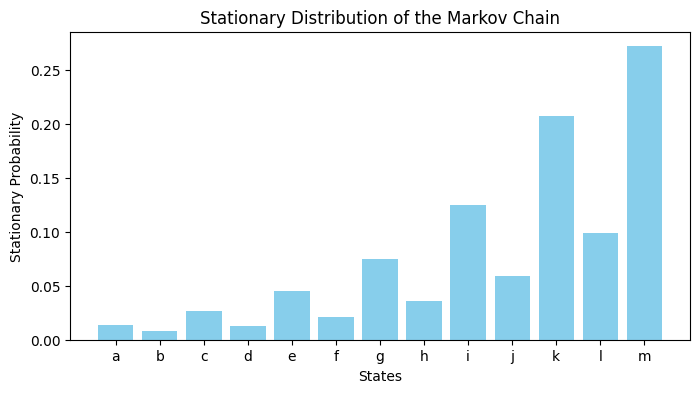

Q1.2 - Stationary distribution: [0.01383755 0.00768753 0.02690634 0.01281254 0.0448439  0.02135424
 0.07473983 0.0355904  0.12456639 0.05931733 0.20761065 0.09886221
 0.27187109]

Q1.3 - Entropy rate of the chain: 1.3515 bits per symbol

Q1.4 - Sampled sequence:
aaaaaaaaaaaaaaaaaaaaabaceeeeeeeeegiijkkkikkmmkjjjiiikkkkkikmmmmmmmmllllmkkiklkllllmmmmmmmmmmmmmmmmkiijjjjjjiiiiiikkkmmllkkikkmmmlkkkkkkkmlllmkklkikmmmlmmlllllllllmmmmllkmkkkkkkkkmmmmllllmmmkkkkkkkkmmmmmmkkkkmmmmmmklllllmmmmmmmllllmmmllmmmmkkiiiiiiiiiiijjjjjkmmmmmkkkjjkkkklllmmmmmmmmmmmmmmlmmlllklllllllllllllkllkkiiiiihiiikkiihhgecedeeeeefefffeggiiikkkmmmmmmmllkjikkiiigggggggijjjkmmmmmmmmllmmmmmmmmmmkmmmmmmmmmmmmmmmmmmmmmmmmlmmmmmkkkjjjiihhiiiikkkigfffggikmmmmmmmmmkkiijjjkkkkkkmmmmmmmmmmkmmmmkkkj


In [129]:
# Answer to q2:

import matplotlib.pyplot as plt

def compute_stationary(Q, states):
    """
    Compute and plot the stationary distribution of a Markov chain.

    Args:
        Q: transition matrix (numpy array of shape n x n)
        states: list of state labels (length n)

    Returns:
        pi: stationary distribution (numpy array of length n)
    """
    # Solve pi * Q = pi  <=>  (Q^T - I)^T * pi = 0
    n = Q.shape[0]
    A = Q.T - np.eye(n)
    # Add constraint sum(pi) = 1
    A = np.vstack([A, np.ones(n)])
    b = np.zeros(n + 1)
    b[-1] = 1
    # Solve linear system
    pi, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

    # Plot
    plt.figure(figsize=(8,4))
    plt.bar(states, pi, color='skyblue')
    plt.xlabel('States')
    plt.ylabel('Stationary Probability')
    plt.title('Stationary Distribution of the Markov Chain')
    plt.show()

    return pi

def entropy_rate(Q, pi):
    """
    Compute the entropy rate of a Markov chain.

    Args:
        Q: transition matrix (numpy array n x n)
        pi: stationary distribution (numpy array length n)

    Returns:
        H: entropy rate in bits per symbol
    """
    H = 0.0
    n = Q.shape[0]
    for i in range(n):
        for j in range(n):
            if Q[i, j] > 0:
                H += pi[i] * (-Q[i, j] * np.log2(Q[i, j]))
    return H

def sample_markov(Q, states, n, start_state, seed=YOUR_ID_NUMBER):
    """
    Sample a sequence of length n from a Markov chain with transition matrix Q.

    Args:
        Q: transition matrix (numpy array n x n)
        states: list of state labels (length n)
        n: length of the sequence to generate
        start_state: initial state (string)
        seed: random seed for reproducibility

    Returns:
        seq: string of states sampled from the Markov chain
    """
    np.random.seed(seed)
    state_dict = {state: i for i, state in enumerate(states)}
    current = state_dict[start_state]
    seq = [start_state]

    for _ in range(n-1):
        current = np.random.choice(len(states), p=Q[current])
        seq.append(states[current])

    return "".join(seq)

Q = build_Q()
pi = compute_stationary(Q, Xcal)
print("Q1.2 - Stationary distribution:", pi)
print()

H = entropy_rate(Q, pi)
print(f"Q1.3 - Entropy rate of the chain: {H:.4f} bits per symbol")
print()

n = 500
sequence = sample_markov(Q, Xcal, n, start_state='a', seed=YOUR_ID_NUMBER)
print("Q1.4 - Sampled sequence:")
print(sequence)





## 2. Joint Typicality and Channel Coding
(Based on problem 7.15 in Thomas \& Cover)

Consider a binary symmetric channel (BSC) with bit-flip probability $p=0.3$. Namely,
$$
P_{Y|X} = \begin{bmatrix} 0.7 & 0.3 \\
0.3 & 0.7 
\end{bmatrix}
$$
1. What is the capacity of this channel? What is the input distribution $P_X^*$ that achieves the capacity?
2. Write the joint distribution $P_{X,Y}$ (as a $2 \times 2$ matrix) when $P_X = P_X^*$ is the distribution in (1).
3. Find $H(X)$, $H(Y)$, $H(X,Y)$, and $I(X,Y)$ when $P_X = P_X^*$.
4. Henceforth, assume that $X_1,X_2,\ldots,X_n$ be drawn IID according to $\mathrm{Bernoulli}(1/2)$ distribution. Of the $2^n$ possible input sequence of length $n$, how many are typical (i.e., members of $A_{\epsilon}^{(n)}(X)$)? How many $Y$ sequences are typical? Explain.
5. Let $Z^n$ the sequence indicating bit-flips, so that we have $Y^n = X^n \oplus Z^n$ and $Z^n$ is independent of $X^n$. Argue that
$$
 p(x^n,y^n) = p(x^n)p(z^n) = \left(\frac{1}{2} \right)^n (1 - p)^{n -k} p^k,
$$
where $k$ is the number of bit-flips (non-zeros of $z^n$).

6. Recall the jointly typical set $A_{\epsilon}^{(n)}(X,Y)$ defined in class. Based on (5), show that $(x^n,y^n) \in A_{\epsilon}^{(n)}(X,Y)$ if and only if $z^n \in A_{\epsilon}^{(n)}(Z)$.  
7. Write a program that checks if a sequence is in the set $A_{\epsilon}^{(n)}(Z)$. What is the size of the set $A_{\epsilon}^{(n)}(Z)$ for $\epsilon=0.05$ and $n=50$?
8. Now consider random coding for the channel $P_{Y|X}$ as in the proof of the achievability of the channel coding theorem. Assume that a codebook is generated by drawing $2^{nR}$ length-$n$ codewords independently from $\mathrm{Bernoulli}(1/2)$. In order to send a message $w \in \{1,\ldots,2^{nR}\}$, send the $w$-th row in the codebook over the channel. The receiver looks at the received sequence and tries to find a codeword $\hat{w}$ that is mapped to some $x^n(\hat{w})$ that is jointly typical with $y^n$.
 - Implement the decoder in `decode_message` for an arbitrary codeword and $\epsilon$ (see code prototype below). 
 - Set your seed to your ID number. For rates $R=0.05, 0.1, 0.2$, $n=90$, and $\epsilon=0.05$, generate a random codebook using the function ``build_random_codebook`` (once for every $n$ and $R$). Send a total of $N = 100$ independent messages through the channel. Report the following for every $R$.
    - Number of error events of the kind: 'no jointly typical pair was found'
    - Number of error events of the kind: '$w\neq \hat{w}$ because more than one jointly typical pair was found'
    - Average number of events over the $N$ messages (this is an estimate to the average probability of error)

    You can achieve this part using the function `check_transmission`, once you complete the code in the indicated places.
- For which of the rates above it is possible to find a sequence $\{\epsilon_n\}_{n=1,2,\ldots}$ such that the total number of error events goes to zero as $n\to \infty$? Explain.


In [130]:
import numpy as np
np.random.seed(42)

def send_through_channel(x, p):
    """
    Simulate a binary symmetric channel with crossover probability p
    """
    z = np.random.rand() < p
    return x ^ z # XOR

def sample_message(n, R):
    """
    Draw a random message out of ceil(2^(nR)) possible messages
    """
    return np.random.randint(np.ceil(2**(R*n)))

def build_random_codebook(n, R):
    """
    Generate a random codebook of 2^(nR) codewords
    """
    return np.random.randint(2, size=(int(np.ceil(2**(R*n))), n))

def encode_message(W, codebook):
    """
    Encode a message W using a codebook
    """
    return codebook[W]

def decode_message(y, codebook, epsilon, p):
    """
    Decode a received message y using the codebook using joint typicality
    In this version, if we find more than one typical codeword we return 
    the index of the first one. We return None if no typical codeword is found.

    Args:
    y: received message
    codebook: the codebook (2D array of size 2^(nR) x n)
    epsilon: joint typicality threshold
    p: channel crossover probability
    """

    # YOUR_CODE_HERE


    # return none if no typical codeword was found
    return None

def simulate_transmission(w, codebook, epsilon, p, verbose=False):
    """
    Simulate the transmission of a message through the channel

    w: message index
    codebook: the codebook (2D array of size 2^(nR) x n)
    epsilon: joint typicality threshold
    p: channel crossover probability

    Returns the decoded message
    """
    x = encode_message(w, codebook)
    y = np.zeros_like(x)
    n = len(x)
    for i in range(n):  # sending n transmissions through the channel
        y[i] = send_through_channel(x[i], p)
    w_hat = decode_message(y, codebook, epsilon)

    if verbose:
        print("Message: ", w)
        print("Encoded message:  ", x)
        print("Received message: ", y)
        print("Decoded message: ", w_hat)
    return w_hat

def check_transmission(N, n, R, epsilon, p):
    """
    Check the transmission of N random messages through the channel.

    N: number of messages to simulate
    n: number of channel uses
    R: code rate
    p: channel crossover probability
    epsilon: joint typicality threshold

    Returns a dictionary with the number of non-typical errors,
    the number of errors resulting from more than one typical errors (when w != w_hat) 
    but not because of a non-typical error. 
    """

    codebook = build_random_codebook(n, R)  # generate a random codebook
    
    num_of_non_typical_error = 0      # update this number in the loop
    num_of_more_other_error = 0       # update this number in the loop

    for _ in range(N):
        w = sample_message(n, R)
        w_hat = simulate_transmission(w, codebook, epsilon, p)

        # YOUR_CODE_HERE
        
    return dict(num_of_non_typical_errors=num_of_non_typical_error,
            num_of_more_other_decoding_errors=num_of_more_other_error)
